In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Сгенерируем выборку из стандартного распределения Коши размера $N = 100$

In [2]:
N = 100
cauchy_rv = sts.cauchy()
sample = cauchy_rv.rvs(N)

Посмотрим на плотности рапределения стандартного нормального распределения и стандартного распределения Коши.

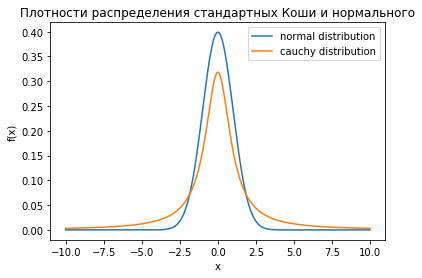

In [3]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, sts.norm.pdf(x), label="normal distribution")
plt.plot(x, sts.cauchy.pdf(x), label="cauchy distribution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Плотности распределения стандартных Коши и нормального")
plt.legend(loc="best");

Можно видеть, что данные плотности довольно похожие, поэтому попробуем использовать выборку из распределения Коши в моделе, где выборка распределена нормально с параметрами $\theta$ и 1, а также известно, что с вероятностью не менее 0.95 выподнено неравенство $|\theta| < 0.5$

Для нормального распределения с неизвестным матожиданием и дисперсией равной 1 сопряженное распределением является также нормальным с параметрами $a$ и $\sigma^2$. Матожидание по апостериорной плотности, а соответственно и байесовская оценка параметра $\theta$, равняется $\frac{\sigma^2 \sum_i X_i + a}{\sigma^2 n + 1}$.

Найдем значения параметров, при которых удовлетворялось бы условие на $\theta$. В силу симметричности данного условия относительно 0 можем положить $a = 0$, тогда получаем:
$$P(|\theta| < 0.5) = \frac{1}{\sqrt{2 \pi \sigma^2}} \int_{-0.5}^{0.5} e^{-\frac{x^2}{2 \sigma^2}} dx = 
\frac{\sigma}{\sqrt{2 \pi \sigma^2}} \int_{-0.5}^{0.5} e^{-\frac{\left(\frac{x}{\sigma}\right)^2}{2}} d\left(\frac{x}{\sigma}\right) 
= \frac{1}{\sqrt{2 \pi}} \int_{-\frac{0.5}{\sigma}}^{\frac{0.5}{\sigma}} e^{-\frac{t^2}{2}} dt > 0.95$$
Последний интеграл равен $P(|\xi| < \frac{0.5}{\sigma})$, где $\xi$ имеет стандартное нормальное распределение. Для данного интеграла существует таблица значений, в которой сказано, что $P(|\xi| < \frac{0.5}{\sigma}) = 0.95$, когда $\frac{0.5}{\sigma} = 1.96$, следовательно $\sigma < \frac{0.5}{1.96}$. Возьмем $\sigma = 0.25$.

Посчитаем байесовскую оценку и оценку максимального правдоподобия, равную $\overline{X}$, для всех $n \leqslant 100$. Построим график зависимости абсолютного отклонения данных оценок от истинного значения параметра $\theta$ от размера выборки.

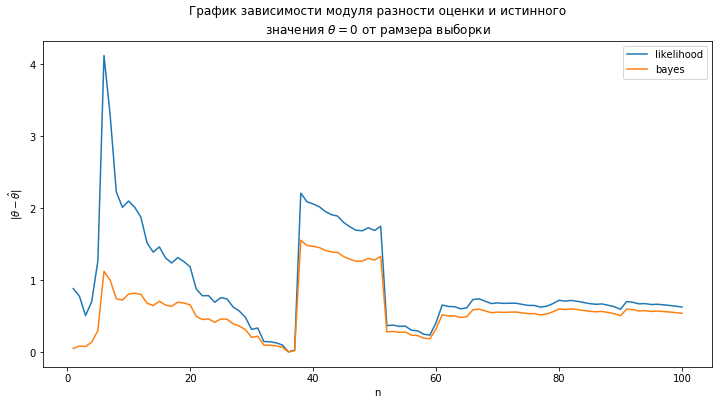

In [4]:
max_likelihood = np.zeros(N)
bayes_estimator = np.zeros(N)
sigma = 0.25

plt.figure(figsize=(12, 6))

for n in range(1, N + 1):
    max_likelihood[n - 1] = np.mean(sample[:n])
    bayes_estimator[n - 1] = (sigma ** 2 * sum(sample[:n])) / (sigma ** 2 * n + 1)
plt.plot(range(1, N + 1), abs(max_likelihood), label="likelihood")
plt.plot(range(1, N + 1), abs(bayes_estimator), label="bayes")
plt.title(r"""График зависимости модуля разности оценки и истинного
значения $\theta = 0$ от рамзера выборки""")
plt.xlabel("n")
plt.ylabel(r"|$\theta - \hat{\theta}$|")
plt.legend(loc="best")
plt.show();

Нарисуем также значения нашей выборки.

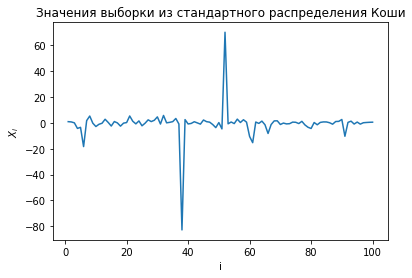

In [5]:
plt.plot(range(1, N + 1), sample)
plt.xlabel("i")
plt.ylabel(r"$X_i$")
plt.title("Значения выборки из стандартного распределения Коши")
plt.show();

Вывод: из графиков видно, что в случае стандартного распределения Коши возможны сильные выбросы, которые сразу же сильно сказываются на значениях оценки. Тем не менее, при больших размерах выборки оценки параметра $\theta$ приближаются к истинному значению. То есть мы показали, что в случае распределения Коши, можно попробовать считать, что выборка дана из нормального распределения, что упрощает поиск сопряженного распределения, а следовательно и байесовской оценки. Причем данная оценка оказалась лучше оценки методом максимального правдоподобия и меньше реагировала на выбросы, так как мы подобрали значения параметров так, чтобы учесть априорные знания о неизвестном параметре $\theta$. Хоть данный метод не дал очень хорошего результата (при $N = 100$ абсолютное отклонение от 0 составило около 1), но учитывая то, что у распределения Коши нет даже матожидания, данный способ можно использовать в качестве приблизительного оценивания неизвестного параметра.